# Kruskal-Wallis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. Cargar base de datos
### *Lista con los nombres de las variables del dataframe

In [2]:
from sklearn.datasets import load_wine

wine_names = load_wine()
names = wine_names['feature_names']
names.append('class')

### *Construcción del dataframe

In [3]:
data, target = load_wine(return_X_y=True)
data = pd.DataFrame(data)
target = pd.DataFrame(target)
wine = pd.concat([data, target], axis=1)
wine.columns = names
wine['class'].replace({0: 'class_0', 1: 'class_1', 2: 'class_2'}, inplace = True)
wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0


## 2. Test de normalidad

### Hipótesis:
$$\begin{cases} 
{ H }_{ 0 }: la \quad variable \quad procede \quad de \quad una \quad distribucion \quad normal \\ 
{ H }_{ 1 }: la \quad variable \quad no \quad procede \quad de \quad una \quad distribucion \quad normal
\end{cases}$$

In [4]:
p_values = pd.DataFrame(stats.normaltest(wine.iloc[:, :-1]).pvalue ,index = names[:-1]).T
p_values.style.applymap(lambda x: 'background-color : lightgreen' if x>=0.05 else 'background-color : salmon')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.000341632,3.17422e-06,0.036316,0.210043,4.65888e-09,0.000555667,0.000126933,0.0026647,0.00800081,5.31948e-05,0.594729,4.87898e-11,0.000425646


En verde los valores estadísticamente no significativos ($p-valor \ge 0.05$) y en rojo los valores estadísticamente significativos ($p-valor<0.05$)

## 2. Test de Homocedasticidad
### Hipótesis:
$$\begin{cases} 
{ H }_{ 0 }: los \quad grupos \quad tienen \quad varianzas \quad iguales \\ 
{ H }_{ 1 }: los \quad grupos \quad no \quad tienen \quad varianzas \quad iguales
\end{cases}$$

In [5]:
stats.levene(wine['magnesium'][wine['class'] == 'class_0'], 
              wine['magnesium'][wine['class'] == 'class_1'],
              wine['magnesium'][wine['class'] == 'class_2']).pvalue

0.519719468148651

## 3. Aplicar test estadístico

El test de Kruskal-Wallis es la alternativa no paramétrica al test ANOVA de un factor para grupos independientes. En esta tecnica se comparan las medias de tres o más grupos. Las hpótesis a contrastar son parecidas a las usadas en el ANOVA, sustituyendo las medias ($\mu$) por las medianas (med).
#### Hipótesis:
$$\begin{cases} { H }_{ 0 }: { med  }_{ i }={ med  }_{ j } \\ { H }_{ 1 }: { med  }_{ i }\neq { med  }_{ j } \end{cases} \quad \forall i\neq j$$

Se realiza la ANOVA para encontrar diferencia en el matiz ("hue") entre las tres clases de vinos

In [10]:
KS_statistic, Pvalue=stats.kruskal(wine['magnesium'][wine['class'] == 'class_0'], 
                                    wine['magnesium'][wine['class'] == 'class_1'],
                                    wine['magnesium'][wine['class'] == 'class_2'])

print('Estadístico de contraste: ' + str(KS_statistic))
print('P-valor: ' + str(Pvalue))

Estadístico de contraste: 40.57642421992753
P-valor: 1.5450460673846685e-09


El P-valor es menor que 0.05, por lo que existen evidencias para rechazar la hipótesis nula. Al menos una de las medias de los grupos es distinta

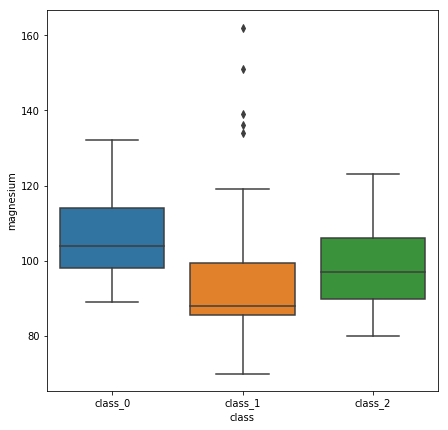

In [7]:
plt.figure(figsize=(7,7))
sns.boxplot(x="class", y="magnesium", data=wine)